In [110]:
import pandas as pd, numpy as np
import geopandas
from shapely.geometry import Point, box
from shapely.geometry.polygon import Polygon


from matplotlib import pyplot as plt

url = 'Geodata/DK_SHAPE_UTM32-EUREF89/FOT/DIVERSE/'
omraade = geopandas.read_file(url +'omraadepolygon.shp').to_crs({'init': 'epsg:4326'})

url = 'Geodata/DK_SHAPE_UTM32-EUREF89/FOT/HYDRO/'
havn = geopandas.read_file(url +'havn.shp').to_crs({'init': 'epsg:4326'})

tmp = havn[havn['HAVNTYPE'] == 'Kyst']
havn = tmp[tmp['UNDER_MIN'] == 'f']
havn.reset_index(inplace=True)
del(tmp)

In [30]:
# Hent Danmarks kort med landsdele
url = 'geodata/NUTS_RG_01M_2016_4326_LEVL_3.geojson'
nuts3 = geopandas.read_file(url)
nuts3_dk = nuts3[nuts3['CNTR_CODE'].isin(['DK'])].to_crs({'init': 'epsg:4326'})

In [104]:
def danbox(x) :
    x1, y1, x2, y2 = x.bounds
    return box(x1, y1, x2, y2)

havn['omkreds'] = havn['geometry'].apply(danbox)

havn.set_geometry('omkreds', inplace=True)

havn.head()
# crs = {'init': 'epsg:4326'}
# polyhavng = geopandas.GeoDataFrame(polyhavn, crs=crs, geometry='geometry')
# polyhavng


# point1 = Point(10.549578, 57.434724) # Frederikshavn Havn
# point2 = Point(10.592475, 57.717554) # Skagen Havn
# point3 = Point(10.055034, 57.048672) # Aalborg Portland

# havne = [point1, point2, point3]
# navne = pd.DataFrame({'havn': ['Frederikshavn Havn', 'Skagen Havn', 'Aalborg Portland'],
#                       'geometry': havne})

# test = geopandas.GeoDataFrame()
# for point in havne :
#     test = test.append(polyhavng[polyhavng['geometry'].contains(point)], sort=False)


C:\Users\pot\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pot\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\geodataframe.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


,index,FOT_ID,MOB_ID,FEAT_KODE,FEAT_TYPE,FEATSTATUS,GEOMSTATUS,HAVNTYPE,UNDER_MIN,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry,omkreds
0,2,1000258581,0,9944,Havn,Taget i brug,Endelig,Kyst,f,2015-11-24,2015-11-24,None,2018-08-30,LINESTRING Z (11.92623661155889 55.93455839751...,"POLYGON ((11.92749754465786 55.93443663753771,..."
1,5,1000258584,0,9944,Havn,Taget i brug,Endelig,Kyst,f,2015-11-24,2015-11-24,None,2018-08-30,LINESTRING Z (11.90556654294369 55.93750628847...,"POLYGON ((11.90760580219009 55.93593141383621,..."
2,6,1016306715,0,9944,Havn,Taget i brug,Endelig,Kyst,f,2017-02-08,2017-02-08,None,2018-08-30,LINESTRING Z (9.194354134249222 56.70158737803...,"POLYGON ((9.194819448771868 56.70028309284754,..."
3,7,1016308026,0,9944,Havn,Taget i brug,Endelig,Kyst,f,2017-02-08,2017-02-08,None,2018-08-30,LINESTRING Z (9.200870484523884 56.70402930062...,"POLYGON ((9.20340697448883 56.70399783285064, ..."
4,8,1000258566,0,9944,Havn,Taget i brug,Endelig,Kyst,f,2015-11-24,2015-11-24,None,2018-08-30,LINESTRING Z (12.00026109567847 55.87004882382...,"POLYGON ((12.00026109567847 55.87001339815053,..."


In [73]:
def danbox(x) :
    return box(x.minx, x.miny, x.maxx, x.maxy)

polyhavn = havn['geometry'].bounds #convex_hull
polyhavn['geometry'] = polyhavn.apply(danbox, axis=1)

crs = {'init': 'epsg:4326'}
polyhavng = geopandas.GeoDataFrame(polyhavn, crs=crs, geometry='geometry')

point1 = Point(10.549578, 57.434724) # Frederikshavn Havn
point2 = Point(10.592475, 57.717554) # Skagen Havn
point3 = Point(10.055034, 57.048672) # Aalborg Portland

havne = [point1, point2, point3]
navne = pd.DataFrame({'havn': ['Frederikshavn Havn', 'Skagen Havn', 'Aalborg Portland'],
                      'geometry': havne})

test = geopandas.GeoDataFrame()
for point in havne :
    test = test.append(polyhavng[polyhavng['geometry'].contains(point)], sort=False)


In [90]:
# test.drop(columns=['minx', 'miny', 'maxx', 'maxy'], inplace=True)

havn2 = geopandas.GeoDataFrame(havn.merge(test, left_index=True, right_index=True), geometry='geometry_y')
type(havn2)

geopandas.geodataframe.GeoDataFrame

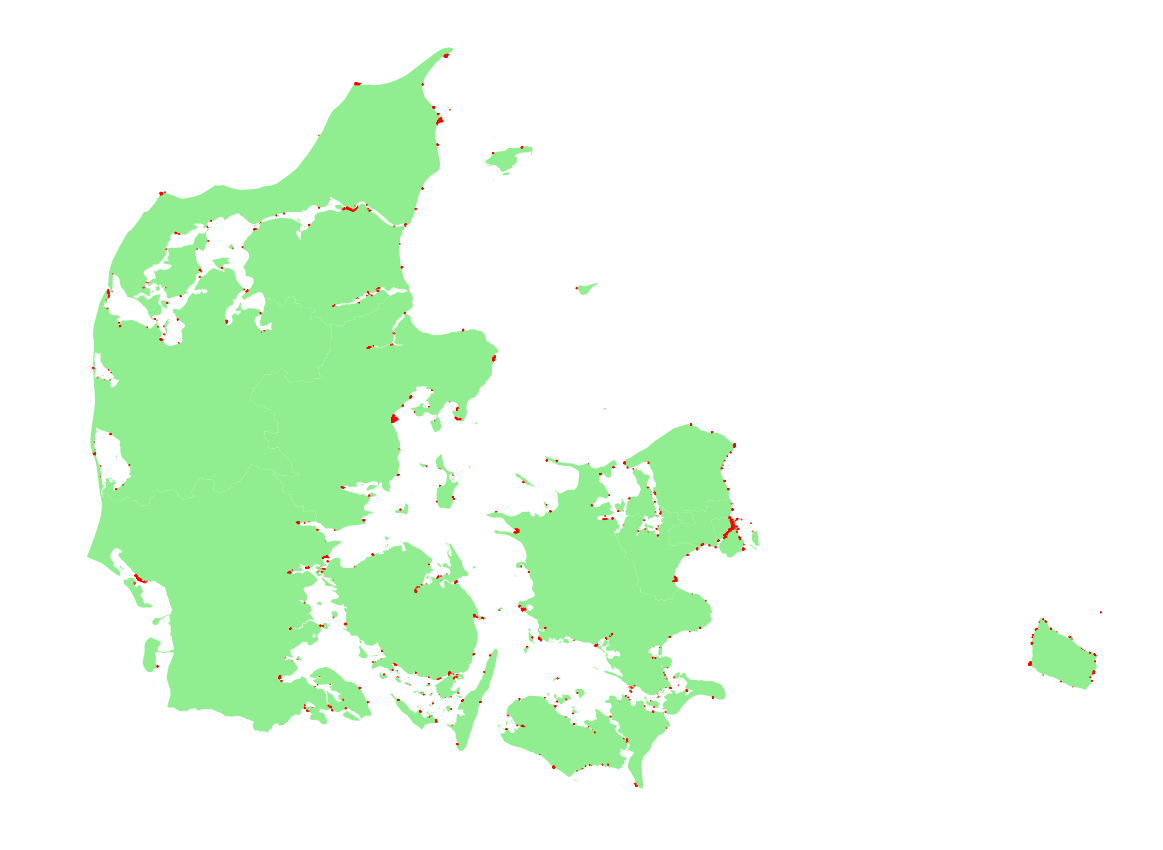

In [111]:
f, a = plt.subplots(figsize=(20,15))
a.set_axis_off()
nuts3_dk.plot(ax=a, color='Lightgreen')
# omraade.plot(ax=a, color='Red')
# havn.plot(ax=a, color='Navy')
havn.plot(ax=a, color='Red')
